# EDA

In [ ]:
#!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/8d/9d/d06860390f9d154fa884f1740a5456378fb153ff57443c91a4a32bab7092/matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a9/57/86c500d63b3e26e5b73a28b8291a67c5608d4aa87ebd17bd15bb33c178bc/contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c4/03/8136887d1b0b7a9831c7e8e2598c0e5851e31cc2231295769350349a236b/fonttools-4.55.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [7]:
data_path = "/root/NLP_PJT/data/"

In [8]:
train_df = pd.read_csv(os.path.join(data_path,'train.csv'))
train_df

,fname,dialogue,summary,topic
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...",건강검진 받기
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,백신
2,train_2,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...",열쇠 찾기
3,train_3,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,여자친구가 있다
4,train_4,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,댄스
...,...,...,...,...
12452,train_12455,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....,누군가를 태우다
12453,train_12456,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...,컨퍼런스 센터
12454,train_12457,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.,차 렌트
12455,train_12458,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...,실직


### 1) Max_len 분포 (하이퍼파라미터 튜닝할 부분)

In [23]:
train_dialog_length = train_df['dialogue'].apply(lambda x:len(x))
train_summary_length = train_df['summary'].apply(lambda x:len(x))
train_topic_length = train_df['topic'].apply(lambda x:len(x))

print("대화문 길이 정보")
print(train_dialog_length.describe())
print("===============================")
print("요약문 길이 정보")
print(train_summary_length.describe())
print("===============================")
print("주제 길이 정보")
print(train_topic_length.describe())

대화문 길이 정보
count    12457.000000
mean       438.765112
std        220.134710
min         99.000000
25%        299.000000
50%        396.000000
75%        540.000000
max       2546.000000
Name: dialogue, dtype: float64
요약문 길이 정보
count    12457.000000
mean        87.397929
std         37.641178
min         19.000000
25%         61.000000
50%         80.000000
75%        106.000000
max        478.000000
Name: summary, dtype: float64
주제 길이 정보
count    12457.000000
mean         5.104279
std          2.853430
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max        118.000000
Name: topic, dtype: float64


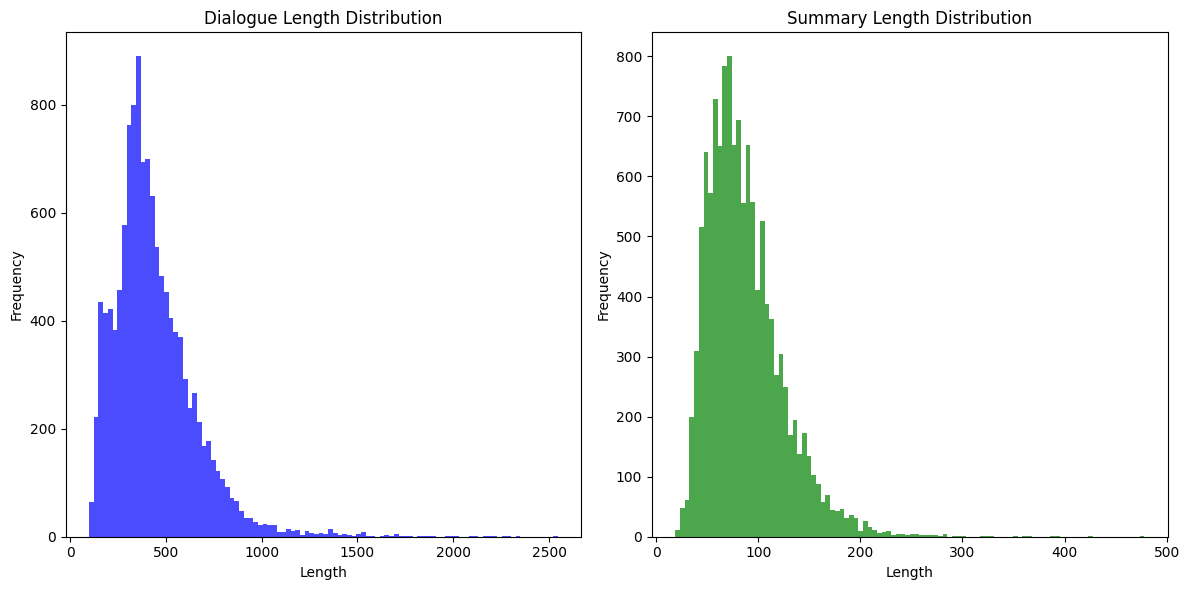

In [10]:
# dialogue 길이 분포 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_dialog_length, bins=100, color='blue', alpha=0.7)
plt.title('Dialogue Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

# summary 길이 분포 시각화
plt.subplot(1, 2, 2)
plt.hist(train_summary_length, bins=100, color='green', alpha=0.7)
plt.title('Summary Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 2) 마스킹된 단어

In [ ]:
import re
def reg_masking(text):
    pattern = r"#\w+#" # ## 사이의 값을 추출하는 정규식 패턴
    masked = re.findall(pattern, text)
    return masked

train_set = train_df['dialogue'].apply(lambda x:str(set(reg_masking(x))))

In [12]:
train_set

0        {'#Person2#', '#Person1#'}
1        {'#Person2#', '#Person1#'}
2        {'#Person2#', '#Person1#'}
3        {'#Person2#', '#Person1#'}
4        {'#Person2#', '#Person1#'}
                    ...            
12452    {'#Person2#', '#Person1#'}
12453    {'#Person2#', '#Person1#'}
12454    {'#Person2#', '#Person1#'}
12455    {'#Person2#', '#Person1#'}
12456    {'#Person2#', '#Person1#'}
Name: dialogue, Length: 12457, dtype: object

In [14]:
all_patterns_set = set()
for dialogue in train_df['dialogue']:
    patterns_in_dialogue = reg_masking(dialogue)
    all_patterns_set.update(patterns_in_dialogue)

In [15]:
# 모든 데이터에서 추출된 고유 패턴 출력
print(sorted(list(all_patterns_set)))

['#Address#', '#CarNumber#', '#CardNumber#', '#DateOfBirth#', '#Email#', '#PassportNumber#', '#Person#', '#Person1#', '#Person2#', '#Person3#', '#Person4#', '#Person5#', '#Person6#', '#Person7#', '#PhoneNumber#', '#SSN#']


##### 3) 어휘 분석(어휘 크기/평균 단어 빈도/희귀 단어 빈도)

##### 4) 의미론적 분석(코사인 유사성이나 임베딩 등)

##### 5) 화자 분석

# Data processing

##### 0. 오타 수정

##### 1. 잘못 마스킹된 토큰 수정(발화 순서 등)

##### 2. 불용어 제거(감탄사/의성어/의태어/부사/접속사)

##### 3. 특수문자 처리(임티나 특수 기호, URL 등)

##### 4. 이상치 처리(요약 너무 길거나 짧거나)

##### 5. 노이즈 처리(무의미하거나 불완전한 대화 등)

##### 6. 요약 모델 아키텍쳐에 특정 전처리(bos/eos 에 토큰 추가 등)

# Data Augmentation

##### 1. EasyDataAugmentation(EDA)

##### - SR: Synonym Replacement 유의어 교체
##### - RI: Random Insertion 임의의 단어 삽입
##### - RS: Random Swap 단어 위치 바꾸기
##### - RD: Random Deletion 임의의 단어 삭제  
##### + 조사 바꿔서 문장 만들기/paraphrase/노이즈 추가

##### 2. Back Translation(BT)

##### 3. KWN augment

In [ ]:
import random
import re
from nltk.corpus import stopwords
from googletrans import Translator  # For Back Translation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet

# Ensure NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Translator for Back Translation
translator = Translator()

# Set Stopwords
STOPWORDS = set(stopwords.words('english'))

# Preprocessing Functions
def preprocess_text(text):
    """
    Basic text preprocessing: lowercasing, removing special characters, stopwords.
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = " ".join([word for word in word_tokenize(text) if word not in STOPWORDS])
    return text

# Augmentation Functions
def synonym_replacement(sentence, n=1):
    """
    Replace `n` random words with synonyms.
    """
    words = word_tokenize(sentence)
    new_words = words[:]
    random.shuffle(words)
    replaced = 0
    for word in words:
        synonyms = get_synonyms(word)
        if synonyms:
            new_words = [synonyms[0] if w == word else w for w in new_words]
            replaced += 1
        if replaced >= n:
            break
    return " ".join(new_words)

def get_synonyms(word):
    """
    Get synonyms for a word using WordNet.
    """
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def random_deletion(sentence, p=0.1):
    """
    Randomly delete words with probability `p`.
    """
    words = word_tokenize(sentence)
    if len(words) == 1:
        return sentence
    new_words = [word for word in words if random.uniform(0, 1) > p]
    return " ".join(new_words)

def random_insertion(sentence, n=1):
    """
    Randomly insert `n` synonyms into the sentence.
    """
    words = word_tokenize(sentence)
    for _ in range(n):
        new_word = None
        while new_word is None:
            random_word = random.choice(words)
            synonyms = get_synonyms(random_word)
            if synonyms:
                new_word = random.choice(synonyms)
        random_idx = random.randint(0, len(words) - 1)
        words.insert(random_idx, new_word)
    return " ".join(words)

def random_swap(sentence, n=1):
    """
    Swap `n` random words in the sentence.
    """
    words = word_tokenize(sentence)
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return " ".join(words)

def back_translation(text, src_lang='en', tgt_lang='fr'):
    """
    Perform back translation to generate paraphrased text.
    """
    try:
        translated = translator.translate(text, src=tgt_lang, dest=src_lang).text
        back_translated = translator.translate(translated, src=src_lang, dest=tgt_lang).text
        return back_translated
    except Exception as e:
        print(f"Back translation failed: {e}")
        return text

# Full Augmentation Pipeline
def augment_text(text, methods=['SR', 'RD', 'RI', 'RS'], back_translate=False):
    """
    Apply selected augmentation methods to the text.
    """
    augmented = text
    if 'SR' in methods:
        augmented = synonym_replacement(augmented, n=1)
    if 'RD' in methods:
        augmented = random_deletion(augmented, p=0.1)
    if 'RI' in methods:
        augmented = random_insertion(augmented, n=1)
    if 'RS' in methods:
        augmented = random_swap(augmented, n=1)
    if back_translate:
        augmented = back_translation(augmented)
    return augmented

# Dataset Processing
def process_dataset(dataset, augment_methods=['SR', 'RD', 'RI', 'RS'], back_translate=False):
    """
    Preprocess and augment the dataset.
    """
    processed_data = []
    for dialogue, summary in dataset:
        preprocessed_dialogue = preprocess_text(dialogue)
        preprocessed_summary = preprocess_text(summary)

        augmented_dialogue = augment_text(preprocessed_dialogue, methods=augment_methods, back_translate=back_translate)

        processed_data.append((augmented_dialogue, preprocessed_summary))
    return processed_data

# Example Usage
if __name__ == "__main__":
    # Example dataset (dialogues and summaries)
    dataset = [
        ("Hi! How are you?", "Greeting between friends."),
        ("I am fine, thanks for asking!", "Response to a greeting.")
    ]

    # Process dataset
    processed_dataset = process_dataset(dataset, back_translate=True)

    # Print results
    for original, processed in zip(dataset, processed_dataset):
        print(f"Original: {original}")
        print(f"Processed: {processed}")
        print()


# 외부 데이터 논의해봐야할 듯

##### 1. GPT 사용 데이터 증강

##### 2. 추가 데이터로 증강

##### - AI hub 한국어 대화 요약 데이터셋 (35만건)

##### - Samsum 데이터셋 영어 대화 요약 > 다시 번역해서 활용 (1.6만개)